## Import Necessary Modules

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt

## Import SciKit-Learn Classes

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Load and Prepare Data

In [3]:
data = pd.read_csv('hour.csv', sep = ',')
data["weekday"] = data.dteday.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

categoricalFeatureNames = ["season","holiday","workingday","weathersit","weekday","mnth","yr","hr"]
dropFeatures = ["dteday", "casual", "registered", "cnt", "atemp", "instant"]

for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

## Split Data Into Train and Test Sections

In [6]:
output_data = data["cnt"]
input_data = data.drop(dropFeatures,axis=1)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

scl= StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)

## Logistic Regression

In [7]:
lrModel = LogisticRegression()
lrModel.fit(X = X_train_scaled, y = y_train)
lrPredictions = lrModel.predict(X = X_test_scaled)
print(lrPredictions)

[276 126   5 ... 276 172   2]


In [8]:
print('RMSLE: %.6f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(lrPredictions + 1))))

RMSLE: 1.747321


## Decision Tree

In [9]:
dtModel = DecisionTreeRegressor()
dtModel.fit(X = X_train_scaled, y = y_train)
dtPredictions = dtModel.predict(X = X_test_scaled)
print(dtPredictions)

[287. 103.  18. ... 585. 268.  76.]


In [10]:
print('RMSLE: %.6f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(dtPredictions + 1))))

RMSLE: 0.452746


## Random Forest

In [11]:
rfModel = RandomForestRegressor(n_estimators=500)
rfModel.fit(X = X_train_scaled, y = y_train)
predictions = rfModel.predict(X = X_test_scaled)
print(predictions)

[363.24  103.024  12.36  ... 559.674 278.126  74.828]


In [12]:
print('RMSLE: %.6f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(predictions + 1))))

RMSLE: 0.354103


## Improvement Analasys

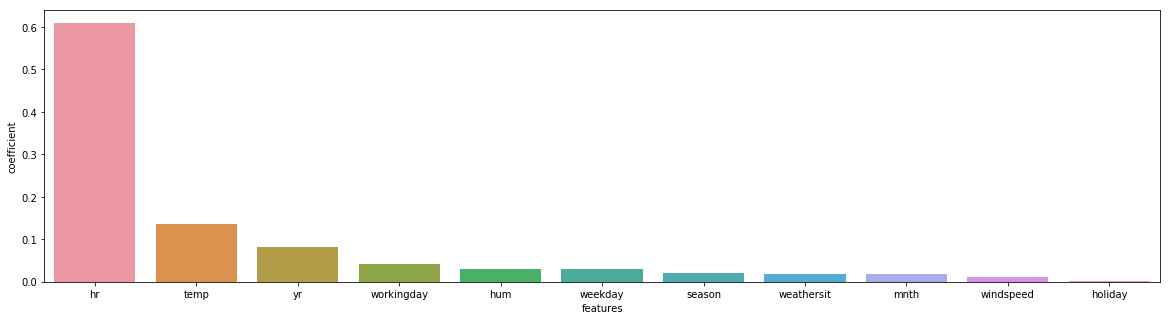

In [13]:
features = pd.DataFrame()
features['features'] = X_train.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=features,x="features",y="coefficient",ax=ax)